# 3. Convolution-2

Give two special kernels below, please discuss the properties and the potential problems (if any). 

Also, please show the visualized results in the report.

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [23]:
imgDataF16 = np.fromfile('data/F16.raw', dtype='uint8')
imgDatalena = np.fromfile('data/lena.raw', dtype='uint8')
imgDataBaboon = np.fromfile('data/Baboon.raw', dtype='uint8')

In [24]:
def raw_read(imgData):
    nr = 512
    nc = 512
    nchan = 1
    c = 0 #用 c來記錄 raw檔讀取到的 index位置
    img = np.zeros((nr, nc, nchan))
    for i in range(nr):
        for j in range(nc):
            for k in range(0, nchan):
                img[i, j, k] = imgData[c]
                c=c+1
    return img

In [25]:
img_F16 = raw_read(imgDataF16).reshape(512,512)
img_lena= raw_read(imgDatalena).reshape(512,512)
img_Baboon= raw_read(imgDataBaboon).reshape(512,512)

# convolution

In [27]:
def Convolve(image, kernel):
    hi, wi= image.shape
    hk, wk = kernel.shape
    image_padded = np.zeros(shape=(hi + hk - 1, wi + wk - 1))    
    image_padded[hk//2:-hk//2+1, wk//2:-wk//2+1] = image
    out = np.zeros(shape=image.shape)
    for row in range(hi):
        for col in range(wi):
            for i in range(hk):
                for j in range(wk):
                    out[row, col] += image_padded[row + i, col + j]*kernel[i, j]
    return out

# Kernel-1

In [28]:
kernel_1 = np.array([[-1,0,-1], [0,6,0], [-1,0,-1]])

In [20]:
kernel_1

array([[-1,  0, -1],
       [ 0,  6,  0],
       [-1,  0, -1]])

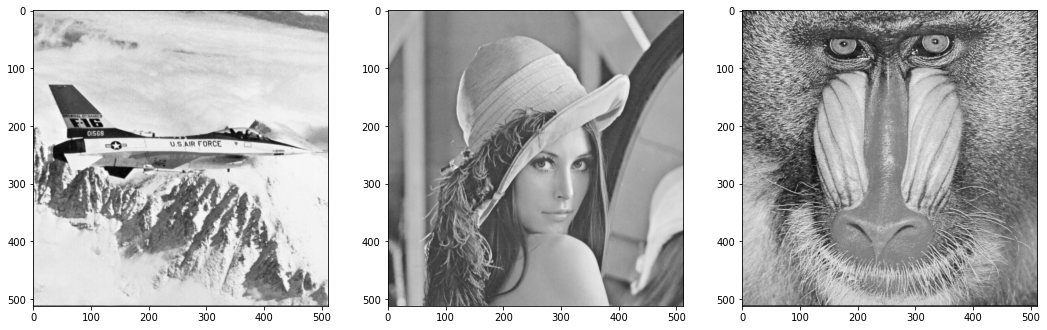

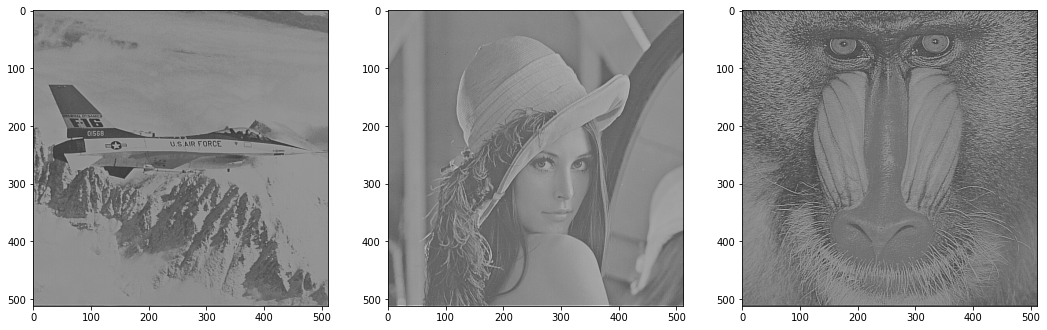

In [40]:
F16_1 = Convolve(img_F16.copy(), kernel_1)
lena_1 = Convolve(img_lena.copy(), kernel_1)
Baboon_1 = Convolve(img_Baboon.copy(), kernel_1)

#原圖
images = [img_F16, img_lena, img_Baboon]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 18))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p, cmap='gray')
#kernel1後的圖
images = [F16_1, lena_1, Baboon_1]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 18))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p, cmap='gray')
plt.show()

# Kernel-2

In [32]:
kernel_2 = np.array([[1,2,1], [0,5,0], [4,2,4]])/25

In [31]:
kernel_2

array([[0.04, 0.08, 0.04],
       [0.  , 0.2 , 0.  ],
       [0.16, 0.08, 0.16]])

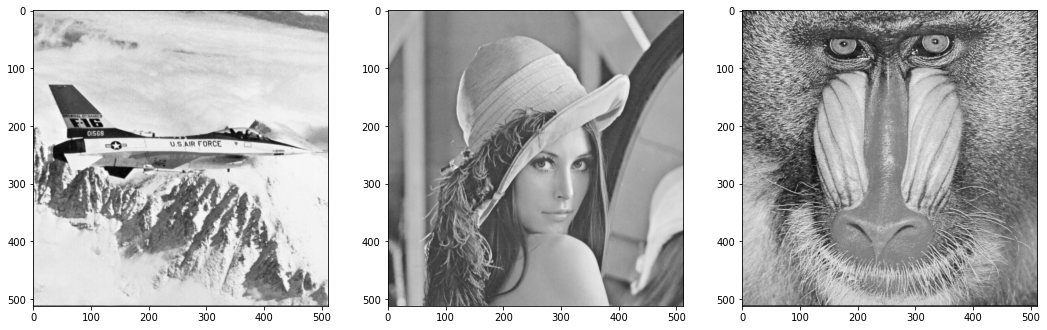

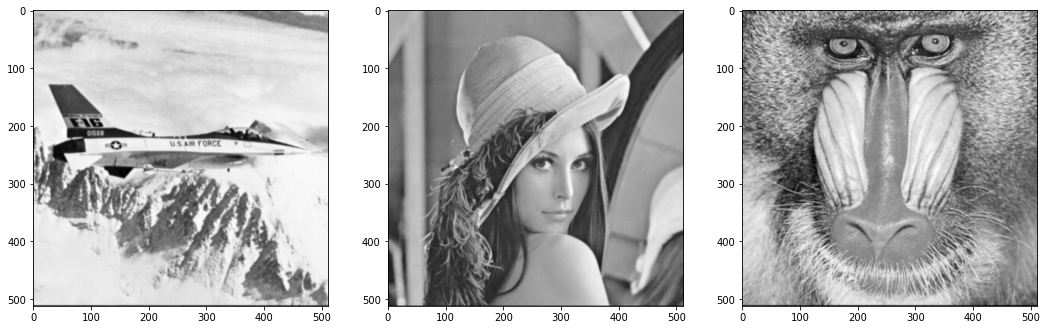

In [42]:
F16_2 = Convolve(img_F16.copy(), kernel_2)
lena_2 = Convolve(img_lena.copy(), kernel_2)
Baboon_2 = Convolve(img_Baboon.copy(), kernel_2)

#原圖
images = [img_F16, img_lena, img_Baboon]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 18))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p, cmap='gray')
    
#kernel2後的圖
images = [F16_2, lena_2, Baboon_2]
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 18))
for ind, p in enumerate(images):
    ax = axs[ind]
    ax.imshow(p, cmap='gray')
plt.show()